In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv("./GerekliVeriler.CSV/Hitters.csv")
df = df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df[["Salary"]]
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X=pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape

(263, 20)

In [5]:
Lasso_model=Lasso().fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [6]:
Lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
Lasso_model.intercept_

array([-5.58745068])

In [8]:
Lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [9]:
#farklı lambda değerlerine karşılık katsayılar

In [10]:
lasso=Lasso()
coefs=[]
alphas=np.random.randint(0,1000,10)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

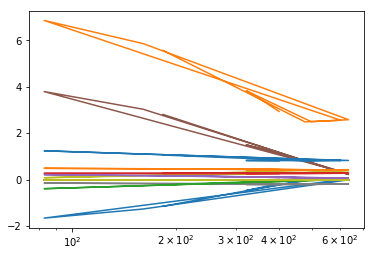

In [11]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [13]:
Lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
Lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

#Lasso Tahmin

In [15]:
#Test Hatası
y_pred= Lasso_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554033

In [18]:
r2_score(y_test,y_pred)# Bağımsız değişkenlerce bağımlı değişenin açıklanma yüzdesidir.

0.4142279813236619

Model_Tuning 

In [19]:
lasso_cv_model=LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
lasso_cv_model.alpha_

563.4670501833854

In [21]:
lasso_tuned=Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [22]:
lasso_tuned=Lasso(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [23]:
y_pred=lasso_tuned.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.5957225069793

In [25]:
pd.Series(lasso_tuned.coef_,index=X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64